In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
df1 = pd.read_csv("results_norm.csv")
df2 = pd.read_csv("results_old.csv")

In [37]:
df1.head()

,Unnamed: 0,Distributed,Pure,Compositional,csi_mean,entropy_purity_mean,gini_purity,total_neurons,weighted_csi,weighted_entropy_purity_mean,weighted_gini_purity,reanimate,model_name,nb_concepts,top_k,avg_final_loss,final_dead_features,ratio
0,0,365,123,24,0.333249,0.157397,0.216618,512,0.148509,0.012058,0.106943,0,top_k_sae,512,51,0.003443,0.005859,0.099609
1,1,184,63,9,0.335706,0.167328,0.228834,256,0.146160,0.012479,0.107847,1,top_k_sae,256,25,0.008115,0.000000,0.097656
2,2,73,48,7,0.444694,0.247256,0.285892,128,0.171126,0.026348,0.116698,0,batch_top_k,128,2,0.171523,0.851562,0.015625
3,3,123,112,21,0.509787,0.293718,0.314909,256,0.193421,0.036252,0.120731,0,top_k_sae,256,51,0.004499,0.000000,0.199219
4,4,41,68,19,0.615242,0.369205,0.383188,128,0.241477,0.054150,0.133252,1,batch_top_k,128,6,0.062366,0.210938,0.046875


In [38]:
df2.head()

,Unnamed: 0,Pure,Compositional,csi_mean,entropy_purity_mean,gini_purity,total_neurons,weighted_csi,weighted_entropy_purity_mean,weighted_gini_purity,reanimate,model_name,nb_concepts,top_k,avg_final_loss,final_dead_features,Distributed,ratio
0,0,33,16.0,0.755461,0.309270,0.261721,49,0.686370,0.249642,0.219594,0,top_k_sae,512,51,0.024901,0.798828,NaN,0.099609
1,1,26,2.0,0.839931,0.466107,0.404490,28,0.761363,0.331657,0.273262,1,top_k_sae,256,25,0.037263,0.007812,NaN,0.097656
2,2,5,NaN,0.813827,0.647076,0.595927,6,0.440182,0.274053,0.290175,0,batch_top_k,128,2,2.002450,0.906250,1.0,0.015625
3,3,36,13.0,0.772045,0.327603,0.278841,49,0.710986,0.270223,0.233332,0,top_k_sae,256,51,0.025654,0.683594,NaN,0.199219
4,4,29,2.0,0.911856,0.671764,0.643166,32,0.664234,0.389114,0.370408,1,top_k_sae,512,10,0.126972,0.025391,1.0,0.019531


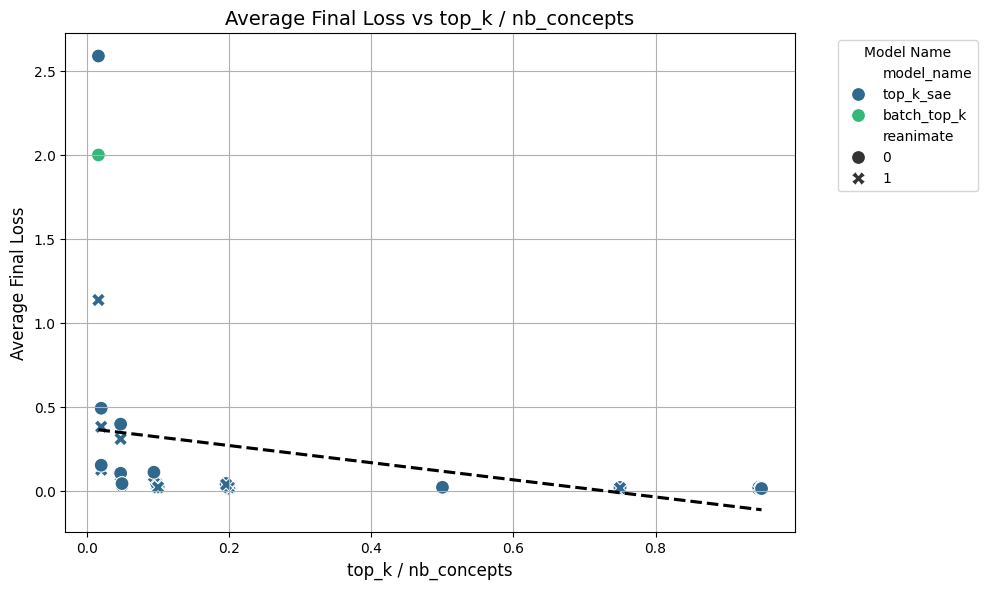

In [69]:

df_ratio = df2.dropna(subset=["top_k", "nb_concepts", "avg_final_loss"])

# Compute ratio
df_ratio["ratio"] = df_ratio["top_k"] / df_ratio["nb_concepts"]

# Plot: Ratio vs Loss
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_ratio,
    x="ratio",
    y="avg_final_loss",
    hue="model_name",
    style="reanimate",
    palette="viridis",
    s=100
)
sns.regplot(
    data=df_ratio,
    x="ratio",
    y="avg_final_loss",
    scatter=False,
    ci=None,
    color='black',
    line_kws={"linestyle": "--"}
)

plt.title("Average Final Loss vs top_k / nb_concepts", fontsize=14)
plt.xlabel("top_k / nb_concepts", fontsize=12)
plt.ylabel("Average Final Loss", fontsize=12)
plt.grid(True)
plt.legend(title="Model Name", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


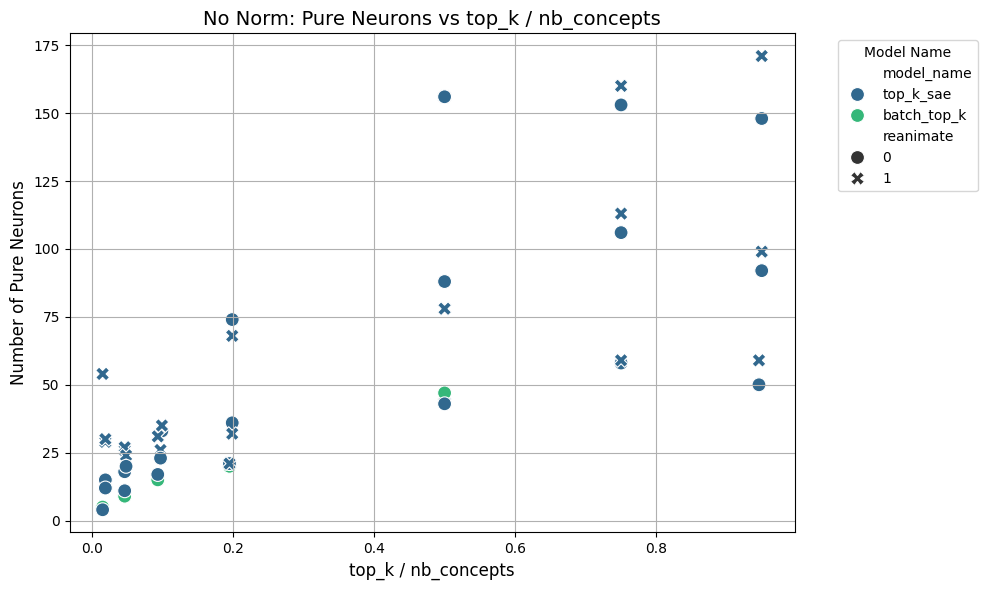

In [55]:
df2["ratio"] = df2["top_k"] / df2["nb_concepts"]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df2,
    x="ratio",
    y="Pure",
    hue="model_name",
    style="reanimate",
    palette="viridis",
    s=100 
)

plt.title("No Norm: Pure Neurons vs top_k / nb_concepts", fontsize=14)
plt.xlabel("top_k / nb_concepts", fontsize=12)
plt.ylabel("Number of Pure Neurons", fontsize=12)
plt.grid(True)
plt.legend(title="Model Name", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

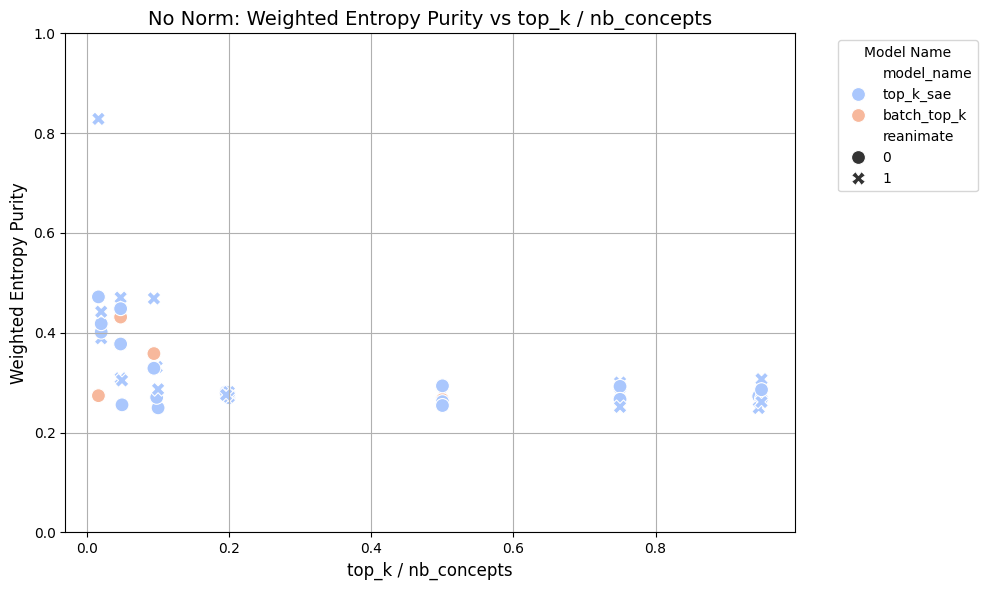

In [56]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df2,
    x="ratio",
    y="weighted_entropy_purity_mean",
    hue="model_name",
    style="reanimate",
    palette="coolwarm",
    s=100  # point size
)

plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.01, 0.2))

plt.title("No Norm: Weighted Entropy Purity vs top_k / nb_concepts", fontsize=14)
plt.xlabel("top_k / nb_concepts", fontsize=12)
plt.ylabel("Weighted Entropy Purity", fontsize=12)
plt.grid(True)
plt.legend(title="Model Name", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


plt.show()

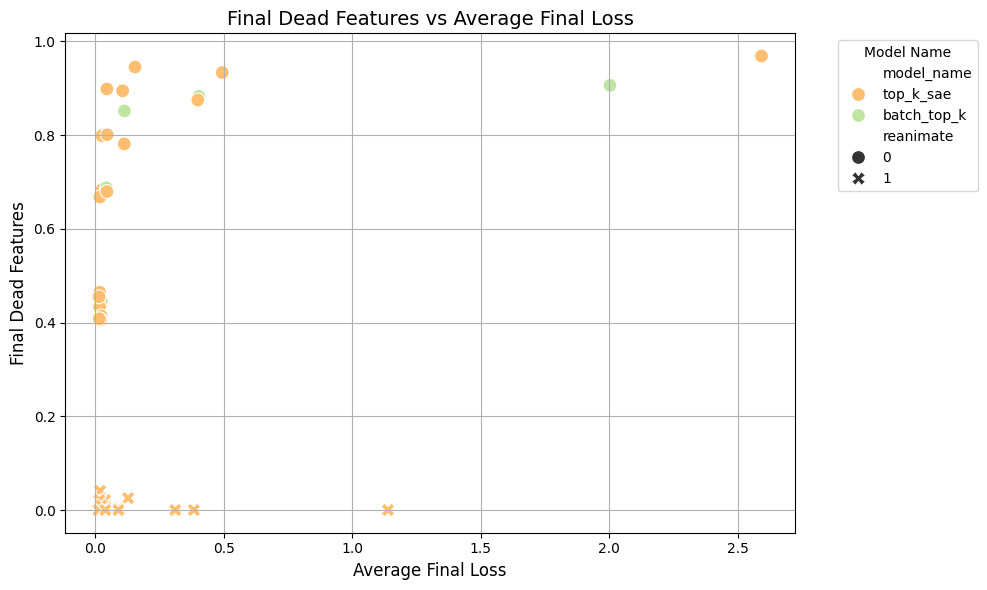

In [64]:
df_loss = df2.dropna(subset=["avg_final_loss", "final_dead_features"])

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_loss,
    x="avg_final_loss",
    y="final_dead_features",
    hue="model_name",
    style="reanimate",
    palette="Spectral",
    s=100
)

plt.title("Final Dead Features vs Average Final Loss", fontsize=14)
plt.xlabel("Average Final Loss", fontsize=12)
plt.ylabel("Final Dead Features", fontsize=12)
plt.grid(True)
plt.legend(title="Model Name", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


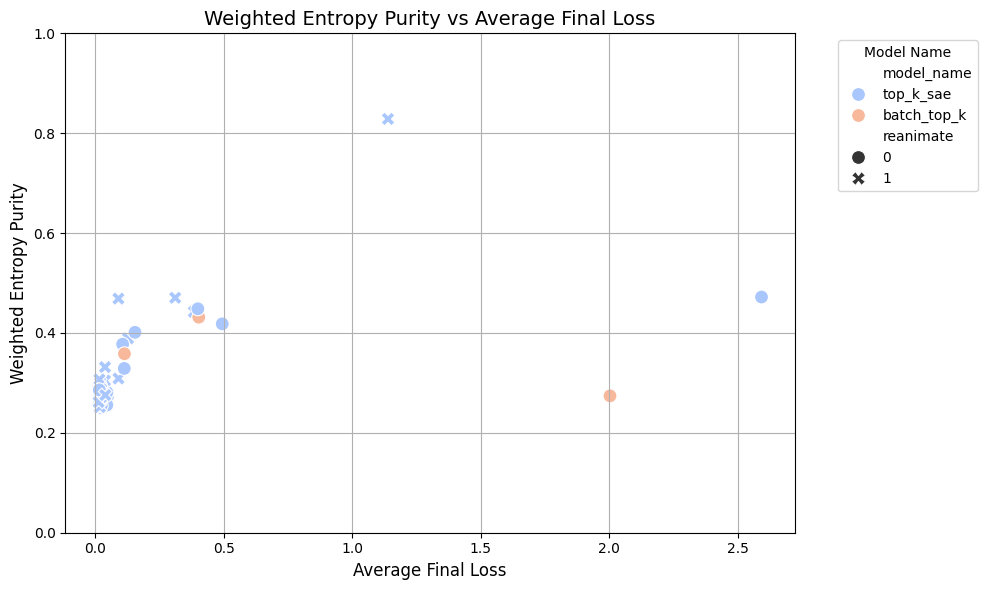

In [65]:
df_entropy = df2.dropna(subset=["avg_final_loss", "weighted_entropy_purity_mean"])

# Plot: Weighted Entropy vs Loss
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_entropy,
    x="avg_final_loss",
    y="weighted_entropy_purity_mean",
    hue="model_name",
    style="reanimate",
    palette="coolwarm",
    s=100
)

plt.title("Weighted Entropy Purity vs Average Final Loss", fontsize=14)
plt.xlabel("Average Final Loss", fontsize=12)
plt.ylabel("Weighted Entropy Purity", fontsize=12)
plt.ylim(0, 1)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.grid(True)
plt.legend(title="Model Name", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

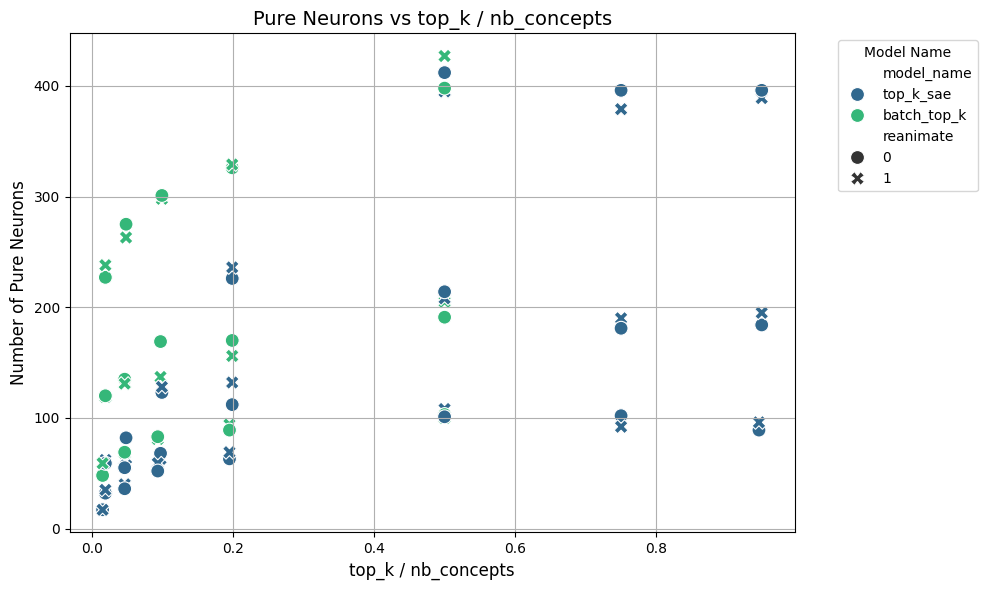

In [48]:
df1["ratio"] = df1["top_k"] / df1["nb_concepts"]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df1,
    x="ratio",
    y="Pure",
    hue="model_name",
    style="reanimate",
    palette="viridis",
    s=100 
)

plt.title("Pure Neurons vs top_k / nb_concepts", fontsize=14)
plt.xlabel("top_k / nb_concepts", fontsize=12)
plt.ylabel("Number of Pure Neurons", fontsize=12)
plt.grid(True)
plt.legend(title="Model Name", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

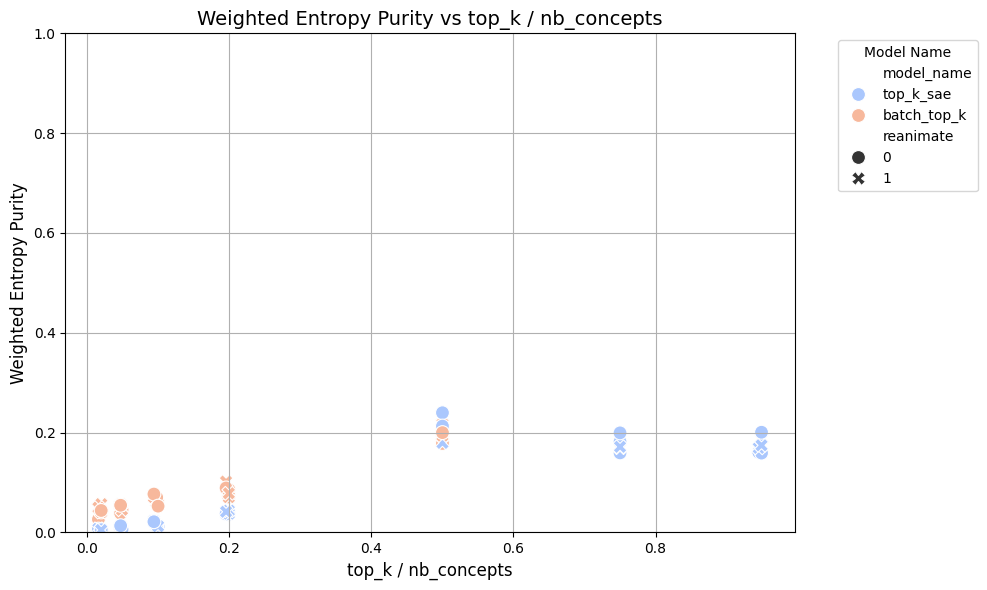

In [54]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df1,
    x="ratio",
    y="weighted_entropy_purity_mean",
    hue="model_name",
    style="reanimate",
    palette="coolwarm",
    s=100  # point size
)

plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.01, 0.2))

plt.title("Weighted Entropy Purity vs top_k / nb_concepts", fontsize=14)
plt.xlabel("top_k / nb_concepts", fontsize=12)
plt.ylabel("Weighted Entropy Purity", fontsize=12)
plt.grid(True)
plt.legend(title="Model Name", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

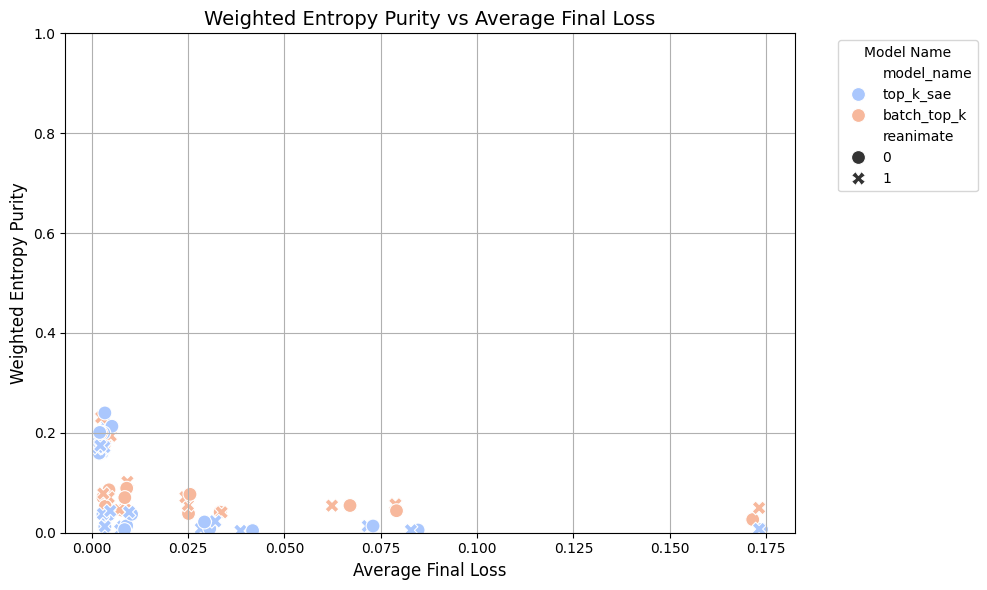

In [67]:
df_entropy = df1.dropna(subset=["avg_final_loss", "weighted_entropy_purity_mean"])

# Plot: Weighted Entropy vs Loss
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_entropy,
    x="avg_final_loss",
    y="weighted_entropy_purity_mean",
    hue="model_name",
    style="reanimate",
    palette="coolwarm",
    s=100
)

plt.title("Weighted Entropy Purity vs Average Final Loss", fontsize=14)
plt.xlabel("Average Final Loss", fontsize=12)
plt.ylabel("Weighted Entropy Purity", fontsize=12)
plt.ylim(0, 1)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.grid(True)
plt.legend(title="Model Name", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

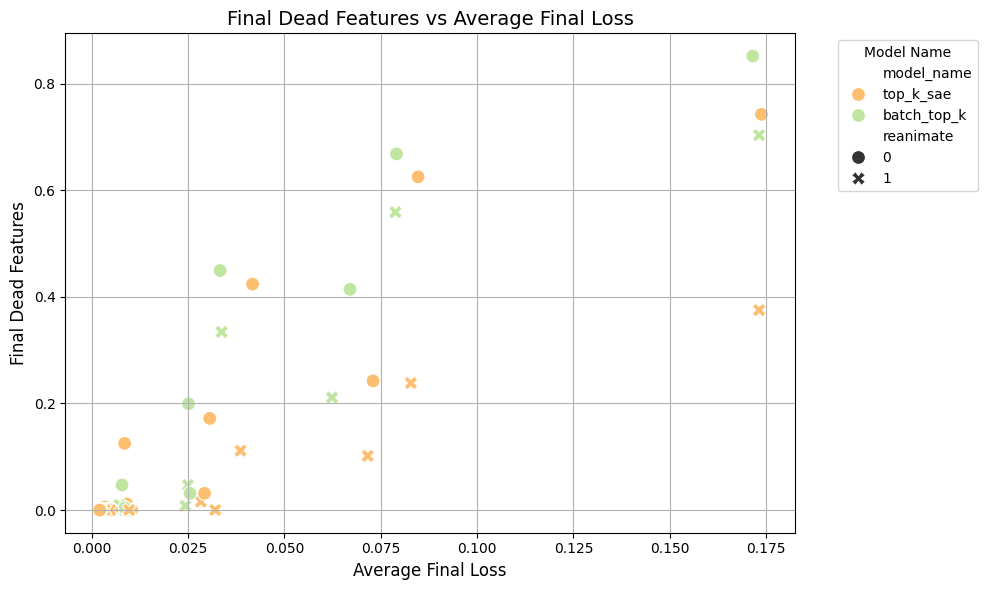

In [66]:
df_loss = df1.dropna(subset=["avg_final_loss", "final_dead_features"])

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_loss,
    x="avg_final_loss",
    y="final_dead_features",
    hue="model_name",
    style="reanimate",
    palette="Spectral",
    s=100
)

plt.title("Final Dead Features vs Average Final Loss", fontsize=14)
plt.xlabel("Average Final Loss", fontsize=12)
plt.ylabel("Final Dead Features", fontsize=12)
plt.grid(True)
plt.legend(title="Model Name", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()